Intercept (β₀): 740.66
Coefficients Slopes(β₁, β₂, β₃, β₄): [ 11.31108062  40.10949007 -15.69124359 -41.37800678]
Predicted price: 1825.53


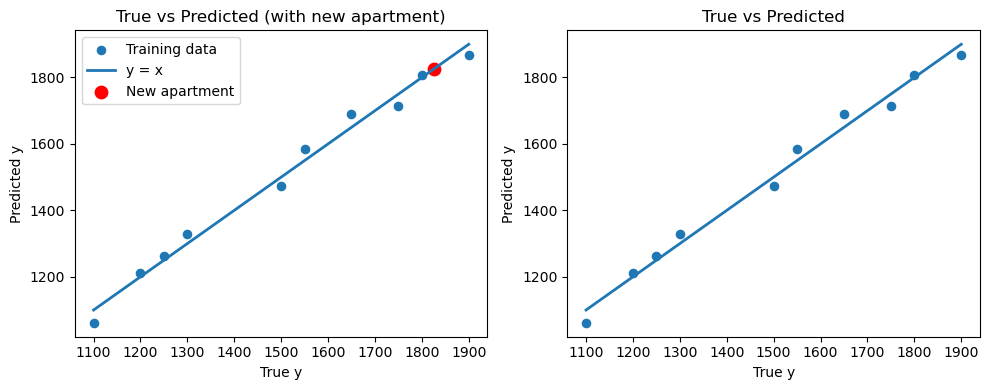

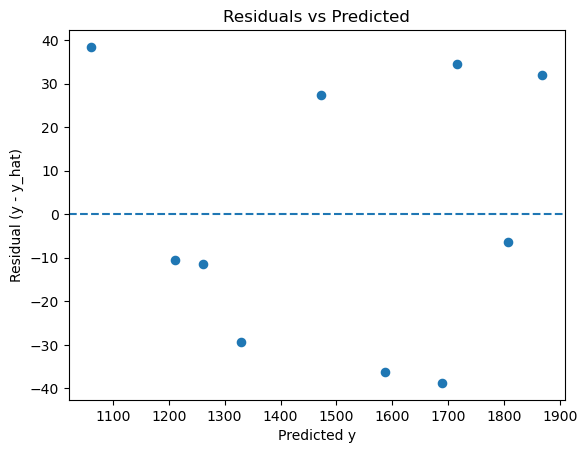

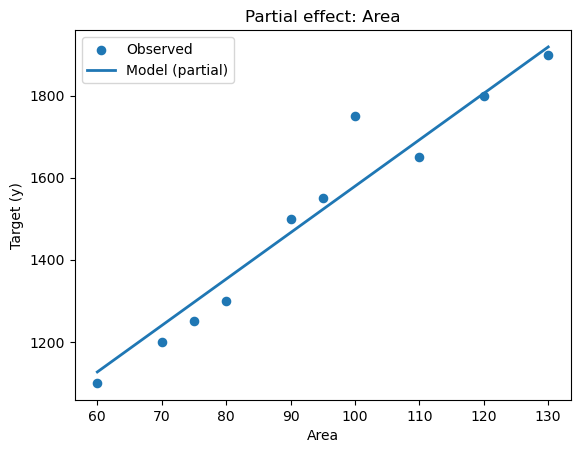

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Area (sqm) | Rooms | Building Age (years) | Distance from City Center (km) | Price (K ILS)
# 70         | 3     | 15                   | 5                               | 1200
# 90         | 4     | 10                   | 7                               | 1500
# 60         | 2     | 20                   | 3                               | 1100
# 120        | 5     | 5                    | 10                              | 1800
# 80         | 3     | 12                   | 6                               | 1300
# 110        | 4     | 8                    | 8                               | 1650
# 100        | 4     | 7                    | 5                               | 1750
# 75         | 3     | 18                   | 4                               | 1250
# 95         | 4     | 9                    | 6                               | 1550
# 130        | 5     | 3                    | 12                              | 1900


# y = β₀ + β₁x₁ + β₂x₂ + ... + βₚxₚ + ε

# Example features and target
X = np.array([
    [70, 3, 15, 5],
    [90, 4, 10, 7],
    [60, 2, 20, 3],
    [120, 5, 5, 10],
    [80, 3, 12, 6],
    [110, 4, 8, 8],
    [100, 4, 7, 5],
    [75, 3, 18, 4],
    [95, 4, 9, 6],
    [130, 5, 3, 12]
])
y = np.array([1200, 1500, 1100, 1800, 1300, 1650, 1750, 1250, 1550, 1900])

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Get coefficients
print(f"Intercept (β₀): {model.intercept_:.2f}")
print(f"Coefficients Slopes(β₁, β₂, β₃, β₄): {model.coef_}")

# ---------- Visualization ----------

# Predict for training set
y_pred = model.predict(X)

# plots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Left panel: True vs Predicted (with new apartment)
new_apartment = np.array([[115, 6, 8, 8]])
predicted_price = model.predict(new_apartment)[0]
print(f"Predicted price: {predicted_price:.2f}")

axes[0].scatter(y, y_pred, s=35, label="Training data")
axes[0].plot([y.min(), y.max()], [y.min(), y.max()], linewidth=2, label="y = x")
axes[0].scatter(predicted_price, predicted_price, color="red", s=80, label="New apartment")
axes[0].set_xlabel("True y")
axes[0].set_ylabel("Predicted y")
axes[0].set_title("True vs Predicted (with new apartment)")
axes[0].legend()

# Right panel: True vs Predicted (original)
axes[1].scatter(y, y_pred, s=35)
axes[1].plot([y.min(), y.max()], [y.min(), y.max()], linewidth=2)
axes[1].set_xlabel("True y")
axes[1].set_ylabel("Predicted y")
axes[1].set_title("True vs Predicted")

plt.tight_layout()
plt.show()

# 2) Residuals vs Predicted
residuals = y - y_pred
plt.figure()
plt.scatter(y_pred, residuals, s=35)
plt.axhline(0, linestyle='--')
plt.xlabel("Predicted y")
plt.ylabel("Residual (y - y_hat)")
plt.title("Residuals vs Predicted")
plt.show()

# 3) Partial effect of a single feature
feature_names = ["Area", "Rooms", "Age", "Distance"]
j = 0  # choose which feature to vary: 0=Area, 1=Rooms, 2=Age, 3=Distance

x_grid = np.linspace(X[:, j].min(), X[:, j].max(), 120)
X_ref = X.mean(axis=0)
X_plot = np.tile(X_ref, (len(x_grid), 1))
X_plot[:, j] = x_grid
y_grid = model.predict(X_plot)

plt.figure()
plt.scatter(X[:, j], y, s=35, label="Observed")
plt.plot(x_grid, y_grid, linewidth=2, label="Model (partial)")
plt.xlabel(feature_names[j])
plt.ylabel("Target (y)")
plt.title(f"Partial effect: {feature_names[j]}")
plt.legend()
plt.show()
